In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

df = pd.read_csv("cleaned_data.csv")
# Train test Split
train_x = df.drop('Credit_Score',axis = 1)
train_y = df['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.20)

RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
#ovo for multi-class
SVC_M = SVC(kernel='linear', decision_function_shape = 'ovo')

In [22]:
class Classifier:
    def __init__(self, Model, X, Y) -> None:
        self.CLASS = Model
        self.X = X
        self.Y = Y
        self.CV_SCORE = []
        self.SCORE = []
        self.scoring = {'accuracy': make_scorer(accuracy_score),
                        'precision': make_scorer(precision_score, average='weighted'),
                        'recall': make_scorer(recall_score, average='weighted'),
                        'f1_score': make_scorer(f1_score, average='weighted')
                        }
        self.cm = None
        
    def train(self):
        x_train, x_test, y_train, y_test = train_test_split(self.X, self.Y, test_size=0.2)
        self.CLASS.fit(x_train, y_train)
        y_pred = self.CLASS.predict(x_test)

        self.SCORE = { "Accuracy ": accuracy_score(y_test, y_pred), 
                          "Recall": recall_score(y_test, y_pred, average='weighted'),
                          "Precision": precision_score(y_test, y_pred, average='weighted'),
                          "F1": f1_score(y_test, y_pred, average='weighted')
                          }
        self.cm = confusion_matrix(y_test, y_pred)

    def evaluate(self):
        evaluation = cross_validate(self.CLASS, self.X, self.Y, scoring=self.scoring)

        self.CV_SCORE = { "Accuracy ": evaluation['test_accuracy'].mean(), 
                          "Recall": evaluation['test_recall'].mean(),
                          "Precision": evaluation['test_precision'].mean(),
                          "F1": evaluation['test_f1_score'].mean()
                          }

        self.GRID = {}
    def Grid_Search(self,param,cv,jobs):
        x_train, x_test, y_train, y_test = train_test_split(self.X, self.Y, test_size=0.2)
        Grid = GridSearchCV(self.CLASS, 
                            param_grid = param,
                            scoring='accuracy',
                            cv=cv,
                            n_jobs=-jobs,
                           )
        tune = Grid.fit(x_train, y_train)
        y_pred = tune.predict(x_test)

        self.SCORE = { "Accuracy ": accuracy_score(y_test, y_pred), 
                          "Recall": recall_score(y_test, y_pred, average='weighted'),
                          "Precision": precision_score(y_test, y_pred, average='weighted'),
                          "F1": f1_score(y_test, y_pred, average='weighted')
                          }
        self.cm = confusion_matrix(y_test, y_pred)



    def ConfusionMatrix(self):
        cm_df = pd.DataFrame(self.cm,
                     index = ['Poor','Standard','Good'], 
                     columns = ['Poor','Standard','Good'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()

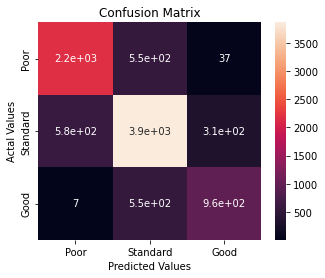

Non-tuned {'Accuracy ': 0.7748754842280022, 'Recall': 0.7748754842280022, 'Precision': 0.773835607267528, 'F1': 0.7735788304400069}


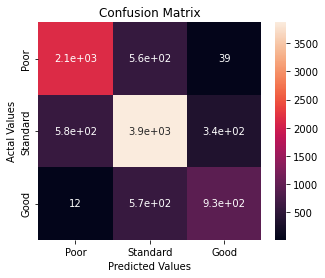

Tuned {'Accuracy ': 0.7683453237410072, 'Recall': 0.7683453237410072, 'Precision': 0.7669091350769917, 'F1': 0.7668385982102705}


In [23]:
Model1 = RandomForestClassifier()
RF = Classifier(Model1,train_x,train_y)
RF.train()
RF.evaluate()
RF.ConfusionMatrix()
print("Non-tuned", RF.SCORE)
param_grid = {'n_estimators': [50, 100, 150],
                'max_depth': [None, 5, 10],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}

RF.Grid_Search(param_grid, 5,1)
RF.ConfusionMatrix()
print("Tuned", RF.SCORE)

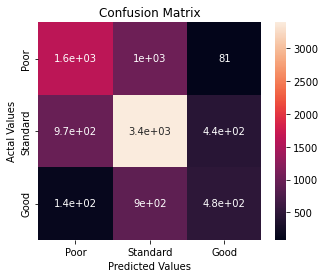

Non-tuned: {'Accuracy ': 0.6076369673491976, 'Recall': 0.6076369673491976, 'Precision': 0.5985703395453034, 'F1': 0.5994591137410256}


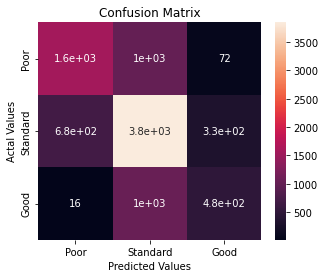

Tuned: {'Accuracy ': 0.6515771997786386, 'Recall': 0.6515771997786386, 'Precision': 0.64580842365112, 'F1': 0.6382880706848123}


In [24]:
Model2 = KNeighborsClassifier(n_neighbors=5)
KNN = Classifier(Model2,train_x,train_y)
KNN.train()
KNN.evaluate()
KNN.ConfusionMatrix()
print("Non-tuned:", KNN.SCORE)

param_grid = {'n_neighbors': (1,31,1),
                'leaf_size': (1,50,1),
                'p': (1,2),
                'weights': ('uniform', 'distance'),
                'metric': ('manhattan', 'euclidean')}
KNN.Grid_Search(param_grid, 5,1)
KNN.ConfusionMatrix()
print("Tuned:", KNN.SCORE)

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being

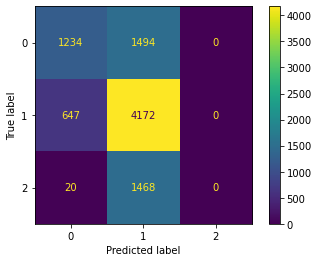

{'Accuracy ': 0.7670171555063642, 'Recall': 0.7670171555063642, 'Precision': 0.7661624541593328, 'F1': 0.7655634447686425}


In [ ]:
SVC_M = SVC(kernel='linear', decision_function_shape = 'ovo')
SVC = Classifier(SVC_M,train_x,train_y)
SVC.train()
SVC.evaluate()
SVC.ConfusionMatrix()
print(SVC.SCORE)

In [ ]:
print(SVC.SCORE)

{'Accuracy ': 0.5983397897066962, 'Recall': 0.5983397897066962, 'Precision': 0.5079145823901088, 'F1': 0.5333092218813011}
